<a href="https://colab.research.google.com/github/Ritam646/CodeAlpha_Handwritten_Character_Recognition/blob/main/CodeAlpha_Handwritten_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emnist

In [2]:
!pip install tensorflow numpy matplotlib scipy

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
import os

drive.mount('/content/drive')

train_file_path = '/content/drive/MyDrive/CodeAlpha_Internship/EMNIST/emnist-letters-train.csv'
test_file_path = '/content/drive/MyDrive/CodeAlpha_Internship/EMNIST/emnist-letters-test.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 76s 66ms/step - accuracy: 0.4953 - loss: 1.6955 - val_accuracy: 0.8767 - val_loss: 0.3981
Epoch 2/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 65s 59ms/step - accuracy: 0.8072 - loss: 0.6025 - val_accuracy: 0.9011 - val_loss: 0.3038
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.8552 - loss: 0.4553 - val_accuracy: 0.9136 - val_loss: 0.2669
Epoch 4/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.8777 - loss: 0.3848 - val_accuracy: 0.9237 - val_loss: 0.2413
Epoch 5/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 65s 59ms/step - accuracy: 0.8872 - loss: 0.3502 - val_accuracy: 0.9289 - val_loss: 0.2322
Epoch 6/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 63s 57ms/step - accuracy: 0.8978 - loss: 0.3143 - val_accuracy: 0.9243 - val_loss: 0.2375
Epoch 7/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.9032 - loss: 0.2961 - val_accuracy: 0.9305 - val_loss: 0.2187
Epoch 8/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9110 -

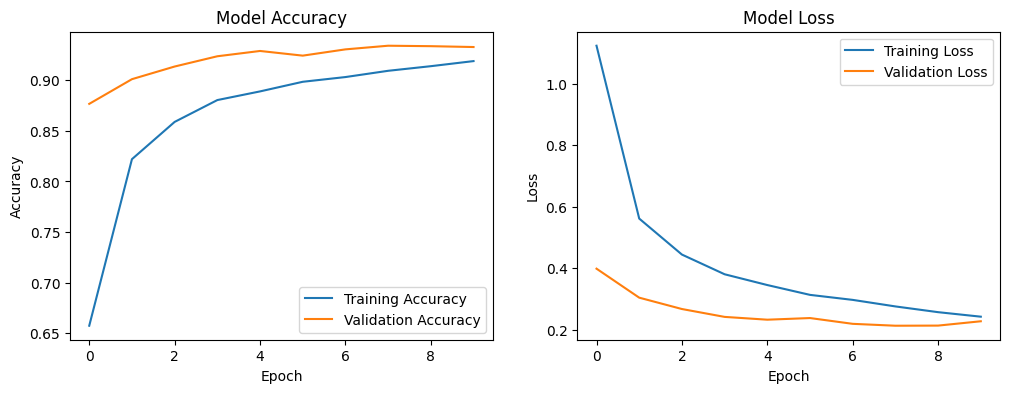

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Predicted: G, True: G
Model saved to /content/drive/MyDrive/CodeAlpha_Internship/handwritten_model.h5


In [5]:
if not (os.path.exists(train_file_path) and os.path.exists(test_file_path)):
    print(f"Error: One or both files not found at {train_file_path} or {test_file_path}.")
    print("Please upload emnist-letters-train.csv and emnist-letters-test.csv to /MyDrive/CodeAlpha_Internship/EMNIST/.")
    print("If your dataset structure differs, share the file names or structure you see after extraction.")


else:

    train_df = pd.read_csv(train_file_path)
    test_df = pd.read_csv(test_file_path)


    x_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    y_train = train_df.iloc[:, 0].values - 1
    x_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    y_test = test_df.iloc[:, 0].values - 1


    num_classes = 26
    y_train = tf.keras.utils.to_categorical(y_train, num_classes)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes)

    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])


    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {test_acc * 100:.2f}%")


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    sample_idx = np.random.randint(0, x_test.shape[0])
    sample_image = x_test[sample_idx:sample_idx+1]
    prediction = model.predict(sample_image)
    predicted_label = chr(ord('A') + np.argmax(prediction))
    true_label = chr(ord('A') + np.argmax(y_test[sample_idx]))
    print(f"Predicted: {predicted_label}, True: {true_label}")
    save_path = '/content/drive/MyDrive/CodeAlpha_Internship/handwritten_model.h5'
    model.save(save_path)
    print(f"Model saved to {save_path}")
